In [5]:
def func1a(stddev, n, m):
    """Function to generate m*n independent variables, n*1 dependent variable, and coefficient matrix

    Args:
        stddev (float): spread of noise in the output variable
        n (int): size of the data set
        m (int): number of indepedent variables

    Returns:
        array: independent, dependent variables matrix and coefficient matrix
    """
    x_ones = np.ones((n, 1))  # first column of ones
    x_random = np.random.rand(n, m - 1)  # (n*m-1) matrix of random Real numbers
    X = np.concatenate((x_ones, x_random), axis=1)  # n rows and m columns where 1st column is of ones
    beta = np.random.rand(m, 1)  # Coefficients
    error = np.random.normal(loc=0, scale=stddev, size=(n, 1))
    Y = np.matmul(X, beta) + error  # X*beta i.e. matrix multiplication of (n*m) and (m * 1) shape= Y shape (n*1)
    return X, Y, beta


In [7]:
def computeCost(X, y, theta):
    m = len(y)  # number of training examples
    diff = np.matmul(X, theta) - y
    J = 1 / (2 * m) * np.matmul(diff, diff)

    return J


In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = []  # repeat until convergance
    for i in range(num_iters):
        hc = np.matmul(X, theta) - y
        theta -= alpha / m * np.matmul(X.transpose(), hc)
        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
        return theta, J_history


In [37]:
def subsets(v, l):
    return _subsets(v, 0, l, [])


def _subsets(v, k, l, acc):
    if l == 0:
        return [acc]
    else:
        r = []
        for i in range(k, len(v)):
            print(v[i])
            # Take i-th position and continue with subsets of length l - 1:
            r.extend(_subsets(v, i + 1, l - 1, acc + [v[i]]))
            print(r)
        return r


In [5]:
import numpy as np

n = 10
m = 5

x_ones = np.ones((n, 1))  # first column of ones
np.random.seed(1998)
x_random = np.random.rand(n, m)  # (n*m) matrix of random Real numbers
X = np.concatenate((x_ones, x_random), axis=1)  # n rows and m+1 columns where 1st column is of ones
beta = np.random.rand(m + 1, 1)  # Coefficients
# error = np.random.normal(loc=0, scale=stddev, size=(n, 1))
# Y = np.array(
#     [1 if  > 0.5 else 0]
# )  # X*beta i.e. matrix multiplication of (n*m) and (m * 1) shape= Y shape (n*1)
Y = np.where(1 / (1 + np.exp(-np.matmul(X, beta))) > 0.5, 1, 0)
# print(X)
# print(Y)


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [18]:
a = np.array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])
# for i in range(len(a)):
import random

for i in random.sample(range(0, 11), 5):
    print(i)
    if a[i] == 1:
        a[i] = 0
    else:
        a[i] = 1
# np.where(a[np.random.randint(0,8,5)]==1,0,1)
a


9
2
7
4
6


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

0
500
1000
1500


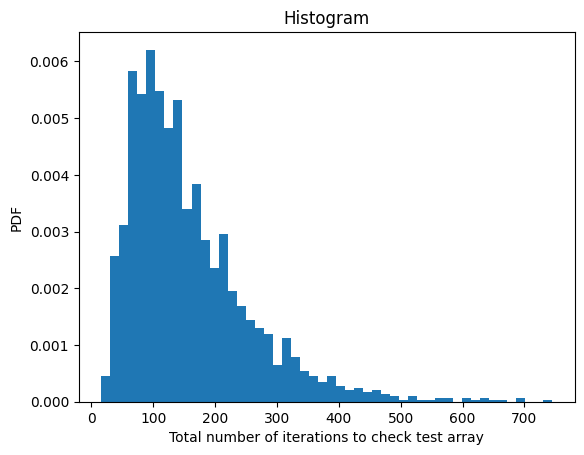


Mean of the iterations 157.7235

Std dev of the iterations 99.00384865120144


In [14]:
from statistics import stdev
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 11)
y = np.arange(1, 11)
X, Y = np.meshgrid(x, y)
n = 2000
store = np.zeros(n)

for j in range(n):
    test = np.array([65, 75, 85, 95, 33, 34, 35, 29, 39, 49, 59])
    if j % 500 == 0:
        print(j)
    for i in range(1, 1111):
        rand = random.sample(range(1, 101),1)[0]
        #  np.random.randint(1, 101)

        if rand in test:
            test = np.delete(test, np.where(test == rand)[0])
            xx = True
            while xx:
                up = rand + 10
                below = rand - 10
                right = rand + 1
                left = rand - 1
                if up in test:
                    test = np.delete(test, np.where(test == up)[0])
                    rand = up
                if below in test:
                    test = np.delete(test, np.where(test == below)[0])
                    rand = below
                if left in test:
                    test = np.delete(test, np.where(test == left)[0])
                    rand = left
                if right in test:
                    test = np.delete(test, np.where(test == right)[0])
                    rand = right
                else:
                    xx = False

            if len(test) == 0:
                store[j] = i
                break
binsize = 50
n1, bins1, patches1 = plt.hist(store, bins=binsize, density=True)
plt.xlabel("Total number of iterations to check test array")
plt.ylabel("PDF")
plt.title("Histogram")
plt.show()
print("\nMean of the iterations", np.mean(store))
print("\nStd dev of the iterations", np.std(store))


In [11]:
import random
type(random.sample(range(1, 101),1)[0])

int

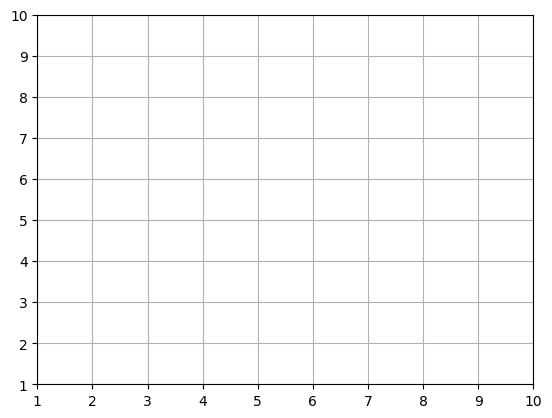

In [102]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 11, 1)
minor_ticks = np.arange(0, 11, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# ax.grid(color='red', linestyle='-.', linewidth=0.7)
ax.grid(which='both')
ax.set_xlim(1,10)
ax.set_ylim(1,10)
plt.show()
